In [ ]:
# import torch

# if torch.cuda.is_available():
#     DEVICE = 'cuda:0'
#     print('Running on the GPU')

In [47]:
%load_ext autoreload
%autoreload 2

In [1]:
from Scene.Scnene import Scene
from Vehicle.Vehicle import Vehicle
from nuscenes.nuscenes import NuScenes as V2XSimDataset
import mmseg
from mmseg.apis import inference_model, init_model, show_result_pyplot
import numpy as np

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
datapath = "D:\\Dataset-Thesis\\temp\\V2X Sim Mini\\V2X-Sim-2.0-mini"
v2x_sim = V2XSimDataset(version='v2.0-mini', dataroot=datapath, verbose=True)

Loading NuScenes tables for version v2.0-mini...
Loading nuScenes-lidarseg...
32 category,
5 attribute,
4 visibility,
157 instance,
130 sensor,
130 calibrated_sensor,
13000 ego_pose,
12 log,
1 scene,
100 sample,
13000 sample_data,
15292 sample_annotation,
3 map,
600 lidarseg,
Done loading in 0.557 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [3]:
v1 = Vehicle(v2x_sim,1)
v4 = Vehicle(v2x_sim,4) 

In [4]:
# config_file = f'{mmseg.__path__[0]}\\.mim\\configs\\segformer\\segformer_mit-b0_8xb1-160k_cityscapes-1024x1024.py'
# checkpoint_file = '.\\checkpoints\\seg\\segformer_mit-b0_8x1_1024x1024_160k_cityscapes_20211208_101857-e7f88502.pth'

# config_file = f'{mmseg.__path__[0]}\\.mim\\configs\\resnest\\resnest_s101-d8_fcn_4xb2-80k_cityscapes-512x1024.py'
# checkpoint_file = '.\\checkpoints\\seg\\fcn_s101-d8_512x1024_80k_cityscapes_20200807_140631-f8d155b3.pth'

# config_file = f'{mmseg.__path__[0]}\\.mim\\configs\\pspnet\\pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
# checkpoint_file = '.\\checkpoints\\seg\\pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# config_file = "C:\\Users\\konst\Downloads\\myModel\\pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py"
# checkpoint_file = "C:\\Users\\konst\Downloads\\myModel\\iter_200.pth"

config_file = '.\\checkpoints\\pspNET\\pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = '.\\checkpoints\\pspNET\\iter_1000.pth'

model = init_model(config_file, checkpoint_file, device='cuda:0')

c:\Users\konst\anaconda3\envs\thesis\lib\site-packages\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\Users\konst\anaconda3\envs\thesis\lib\site-packages\mmseg\models\losses\cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: .\checkpoints\pspNET\iter_1000.pth


In [5]:
time = 1
# v1.showSegImages(model, time)
tempScene1 = v1.generateScene(model, time)
tempScene4 = v4.generateScene(model, time)

In [7]:
# tempScene1.visualizePCD()
# tempScene4.visualizePCD()

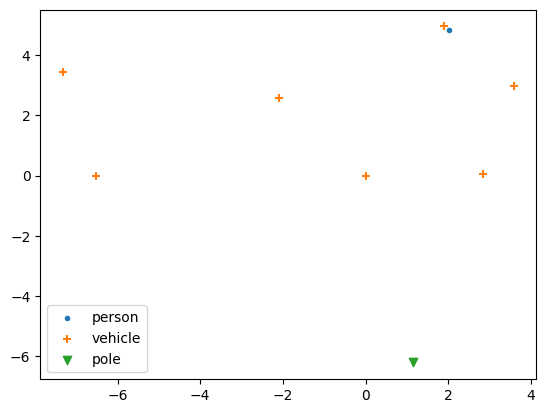

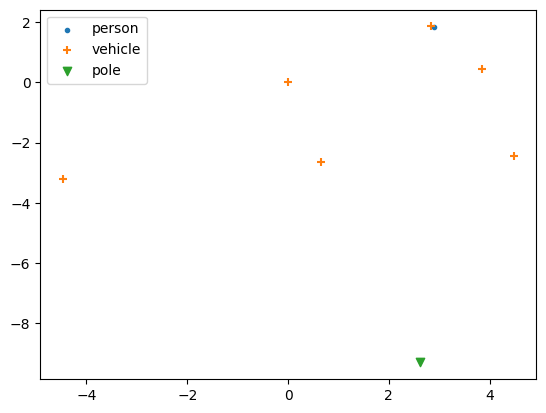

In [64]:
eps =0.5
min_points = 20

g1 = tempScene1.generateGraph(_min_points=min_points, _eps=eps, classNames=['person', 'vehicle', 'pole'])
g1.plotGraph()

g4 = tempScene4.generateGraph(_min_points=min_points, _eps=eps, classNames=['person', 'vehicle', 'pole'])
g4.plotGraph()

graphs = [g1, g4]

In [ ]:
# import pickle
# with open("graphs.pickle", "wb") as file:
#     pickle.dump(graphs, file)

In [60]:
# import networkx as nx

# # Create two NetworkX graphs
# g1 = nx.Graph()
# g2 = nx.Graph()

# # Add the nodes and edges of each input graph to the corresponding NetworkX graph
# g1.add_nodes_from([1, 2, 3])
# g1.add_edges_from([(1, 2), (2, 3)])

# g2.add_nodes_from([1, 2, 4])
# g2.add_edges_from([(1, 2), (2, 4)])

# # Find the MCS of the two NetworkX graphs
# ismags2 = nx.isomorphism.ISMAGS(g1, g2)
# largest_common_subgraph = list(ismags2.largest_common_subgraph())
# # mcs = nx.algorithms.isomorphism.ISMAGS.largest_common_subgraph(g1, g2)

# print(largest_common_subgraph)

# # Print the MCS
# # print(mcs.nodes())
# # print(mcs.edges())

[{1: 1, 2: 2, 3: 4}]
